In [1]:
import pandas as pd


# dataset is loaded in the project
filename = "NewYork_TransitSystemReviews.csv"

def load_housing_data(filenema=filename):
    return pd.read_csv(filename)

DataF = load_housing_data(filename)
DataF

,code,Comments
0,1,Good
1,2,it and cool
2,3,NEW YORK CITY!!!!
3,4,Great!
4,5,Very useful guidance Thanks
...,...,...
95,96,I appreciate it because it give changes alerts...
96,97,"Amazing app, easy to use and understand"
97,98,An Invaluable Tool for Navigating NYC Transpor...
98,99,Great


In [2]:
from textblob import TextBlob

def getSubj(text):
    return TextBlob(text).sentiment.subjectivity

def getPolar(text):
    return TextBlob(text).sentiment.polarity

# calling the above functions, will create the columns with the values computed using TextBlob, 
# a library for python used for NLP

DataF['Subjectivity']=DataF['Comments'].apply(getSubj)
DataF['Polarity']=DataF['Comments'].apply(getPolar)

DataF

,code,Comments,Subjectivity,Polarity
0,1,Good,0.600000,0.700000
1,2,it and cool,0.650000,0.350000
2,3,NEW YORK CITY!!!!,0.454545,0.332919
3,4,Great!,0.750000,1.000000
4,5,Very useful guidance Thanks,0.100000,0.295000
...,...,...,...,...
95,96,I appreciate it because it give changes alerts...,0.000000,0.000000
96,97,"Amazing app, easy to use and understand",0.866667,0.516667
97,98,An Invaluable Tool for Navigating NYC Transpor...,0.441667,0.172222
98,99,Great,0.750000,0.800000


In [3]:
#will create the polarity column which can take a value between [-1, 1]

def getPolarAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
DataF['PolarAnalysis'] = DataF['Polarity'].apply(getPolarAnalysis)
DataF

,code,Comments,Subjectivity,Polarity,PolarAnalysis
0,1,Good,0.600000,0.700000,Positive
1,2,it and cool,0.650000,0.350000,Positive
2,3,NEW YORK CITY!!!!,0.454545,0.332919,Positive
3,4,Great!,0.750000,1.000000,Positive
4,5,Very useful guidance Thanks,0.100000,0.295000,Positive
...,...,...,...,...,...
95,96,I appreciate it because it give changes alerts...,0.000000,0.000000,Neutral
96,97,"Amazing app, easy to use and understand",0.866667,0.516667,Positive
97,98,An Invaluable Tool for Navigating NYC Transpor...,0.441667,0.172222,Positive
98,99,Great,0.750000,0.800000,Positive


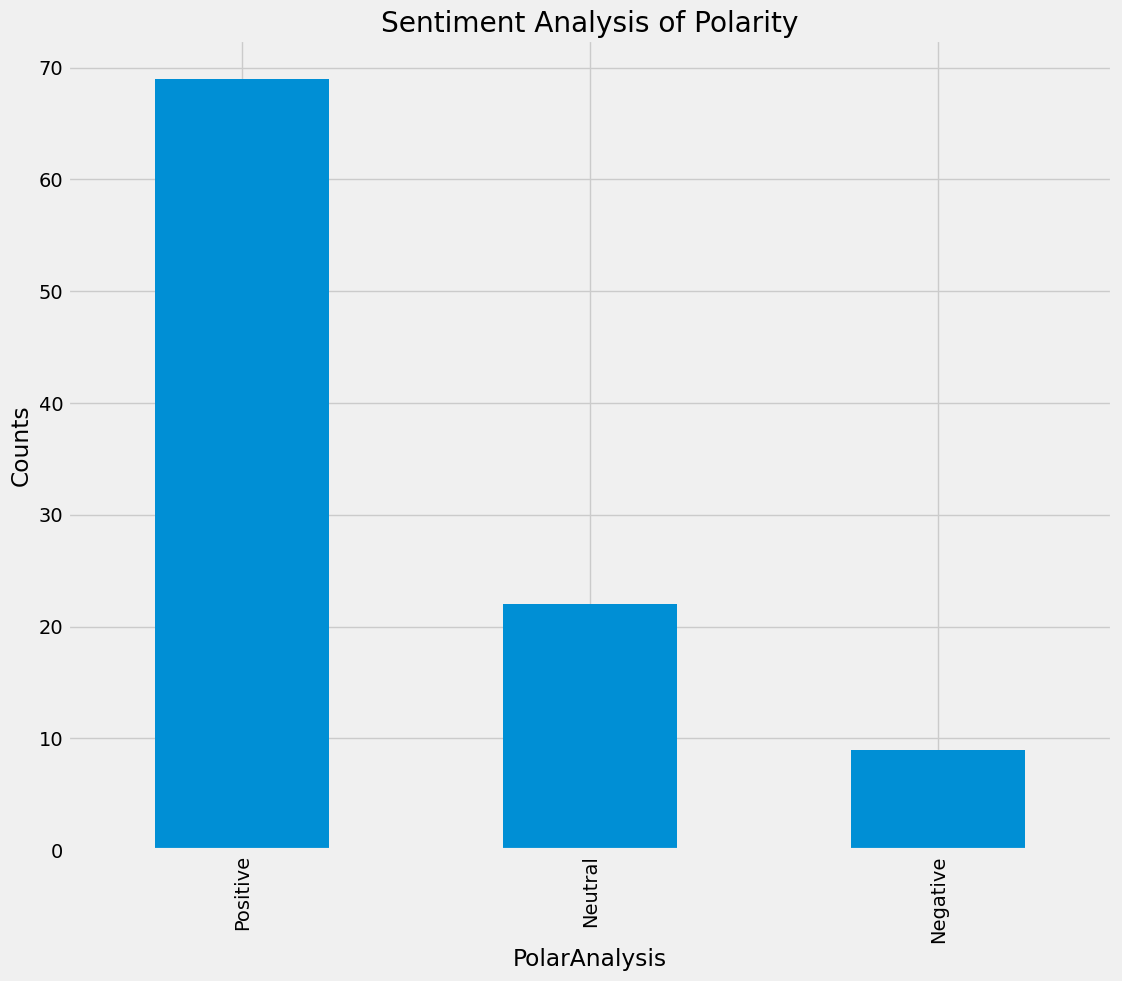

In [4]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,10))
plt.title('Sentiment Analysis of Polarity')
plt.xlabel('Polarity')
plt.ylabel('Counts')
DataF['PolarAnalysis'].value_counts().plot(kind='bar')
plt.show
plt.savefig('polarity.png')

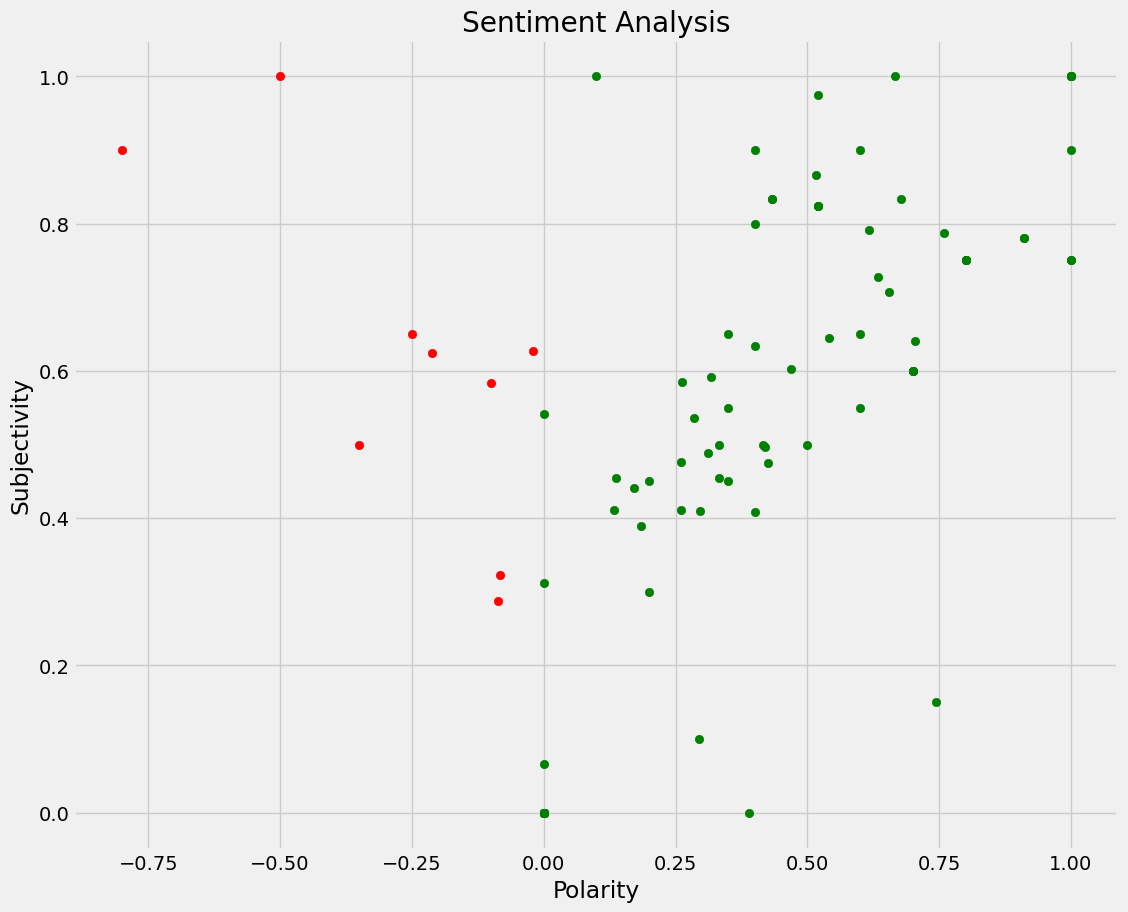

In [5]:
plt.figure(figsize=(12,10))
for i in range(0,DataF.shape[0]):
    if(DataF['Polarity'][i] < 0):
        plt.scatter(DataF['Polarity'][i], DataF['Subjectivity'][i], color='Red')
    else:
        plt.scatter(DataF['Polarity'][i], DataF['Subjectivity'][i], color='Green')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.savefig('SA1.png')
plt.show()

In [6]:
newText = ''

for t in DataF['Comments']:
    newText+=t

newText

'Goodit and coolNEW YORK CITY!!!!Great!Very useful guidance ThanksVery useful during our trip to NYSo far, so goodVery accurateHelped me a lot!Perfect app for New York City!!!Never has accurate bus or train times. They either take way longer, show up way earlier, or never actually show.A life-saver for anyone visiting New York City.Great app! It\'s very accurate. I depend on it when subway station train status displays are not working.Although this app has been VERY helpful with traveling in the city, there are times I\'m unsure if it\'s working or not. An example is when I leave work in the late night and before I leave, I see a time for the next bus. When I leave, it changes (usually dropping the real-time tracking, too).I updated the app NOW and it no longer works. It loads intro and then goes black screen and stays that way. It was a great app and now I can\'t use it anymore.I just updated the app and now it won\'t work for me. It gets stuck on a white screen then closes itself out

In [7]:
from wordcloud import WordCloud, STOPWORDS
import sys, os

wc = WordCloud(
    background_color='white',
    stopwords=STOPWORDS,
    height=600,
    width=400
)

wc.generate(newText)

<function matplotlib.pyplot.show(close=None, block=None)>

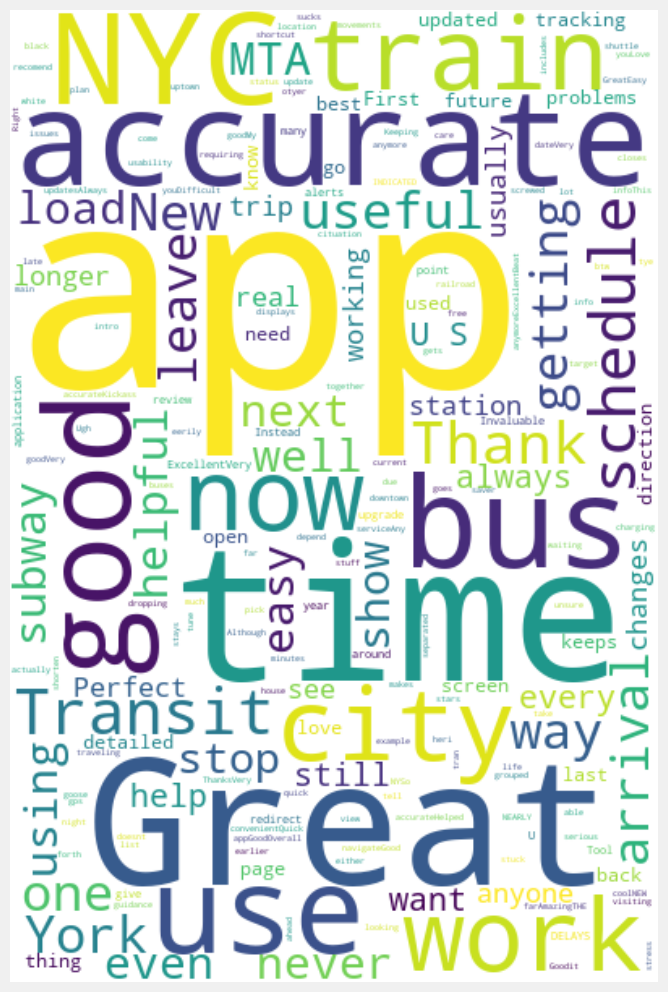

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show

In [9]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(text):
    stop_free = ' '.join([word for word in text.lower().split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = ' '.join([lemma.lemmatize(word) for word in punc_free.split()])
    return normalized.split()


[nltk_data] Downloading package stopwords to C:\Users\Luca
[nltk_data]     Petrescu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Luca
[nltk_data]     Petrescu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
DataF['Comments_clean']=DataF['Comments'].apply(clean)
DataF['Comments_clean']
DataF

,code,Comments,Subjectivity,Polarity,PolarAnalysis,Comments_clean
0,1,Good,0.600000,0.700000,Positive,[good]
1,2,it and cool,0.650000,0.350000,Positive,[cool]
2,3,NEW YORK CITY!!!!,0.454545,0.332919,Positive,"[new, york, city]"
3,4,Great!,0.750000,1.000000,Positive,[great]
4,5,Very useful guidance Thanks,0.100000,0.295000,Positive,"[useful, guidance, thanks]"
...,...,...,...,...,...,...
95,96,I appreciate it because it give changes alerts...,0.000000,0.000000,Neutral,"[appreciate, give, change, alert]"
96,97,"Amazing app, easy to use and understand",0.866667,0.516667,Positive,"[amazing, app, easy, use, understand]"
97,98,An Invaluable Tool for Navigating NYC Transpor...,0.441667,0.172222,Positive,"[invaluable, tool, navigating, nyc, transporta..."
98,99,Great,0.750000,0.800000,Positive,[great]


In [11]:
import gensim
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models
dictionary = corpora.Dictionary(DataF['Comments_clean'])
term_matrix = [dictionary.doc2bow(doc) for doc in DataF['Comments_clean'] ]

In [12]:
print(dictionary.num_nnz)

629


In [13]:
print(len(term_matrix))

100


In [14]:
term_matrix

[[(0, 1)],
 [(1, 1)],
 [(2, 1), (3, 1), (4, 1)],
 [(5, 1)],
 [(6, 1), (7, 1), (8, 1)],
 [(8, 1), (9, 1), (10, 1)],
 [(0, 1), (11, 1)],
 [(12, 1)],
 [(13, 1), (14, 1)],
 [(2, 1), (3, 1), (4, 1), (15, 1), (16, 1)],
 [(12, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 2),
  (23, 2),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 2)],
 [(2, 1), (3, 1), (4, 1), (28, 1), (29, 1), (30, 1)],
 [(5, 1),
  (12, 1),
  (15, 1),
  (26, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1)],
 [(2, 1),
  (15, 1),
  (18, 1),
  (25, 2),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 3),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1)],
 [(5, 1),
  (15, 2),
  (21, 1),
  (27, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1)],
 [(15, 1),
  (55, 1),
  (62, 1),
  (64, 1),
  (66, 1),
  (67,

In [15]:
lda = gensim.models.ldamodel.LdaModel

In [24]:
num_topics=2
ldamodel = lda(term_matrix,num_topics=num_topics,id2word=dictionary,passes=50,minimum_probability=0)

In [25]:
ldamodel.print_topics(num_topics=num_topics)

[(0,
  '0.018*"time" + 0.016*"city" + 0.015*"app" + 0.011*"bus" + 0.011*"nyc" + 0.011*"leave" + 0.009*"new" + 0.009*"york" + 0.009*"transit" + 0.009*"good"'),
 (1,
  '0.056*"app" + 0.027*"great" + 0.022*"accurate" + 0.020*"good" + 0.015*"use" + 0.014*"bus" + 0.011*"schedule" + 0.011*"easy" + 0.010*"excellent" + 0.010*"time"')]

In [18]:
import pyLDAvis.gensim 
lda_display = pyLDAvis.gensim.prepare(ldamodel, term_matrix, dictionary, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display)

TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 were given

In [19]:
lda_corpus = ldamodel[term_matrix]
[doc for doc in lda_corpus]

[[(0, 0.29533002), (1, 0.70466995)],
 [(0, 0.73807794), (1, 0.26192206)],
 [(0, 0.12822278), (1, 0.8717772)],
 [(0, 0.2957572), (1, 0.70424277)],
 [(0, 0.87179726), (1, 0.12820269)],
 [(0, 0.38605574), (1, 0.6139443)],
 [(0, 0.18154474), (1, 0.81845534)],
 [(0, 0.7246632), (1, 0.27533683)],
 [(0, 0.17399815), (1, 0.8260019)],
 [(0, 0.09333361), (1, 0.9066664)],
 [(0, 0.96600014), (1, 0.03399984)],
 [(0, 0.07359351), (1, 0.92640644)],
 [(0, 0.9389278), (1, 0.061072197)],
 [(0, 0.022386428), (1, 0.9776136)],
 [(0, 0.037279796), (1, 0.96272016)],
 [(0, 0.047259156), (1, 0.95274085)],
 [(0, 0.043761387), (1, 0.95623857)],
 [(0, 0.74820566), (1, 0.25179437)],
 [(0, 0.13351008), (1, 0.86648995)],
 [(0, 0.25525045), (1, 0.74474955)],
 [(0, 0.90554655), (1, 0.09445344)],
 [(0, 0.2958265), (1, 0.7041735)],
 [(0, 0.25592533), (1, 0.74407464)],
 [(0, 0.89397436), (1, 0.1060256)],
 [(0, 0.8306789), (1, 0.16932112)],
 [(0, 0.8297434), (1, 0.17025658)],
 [(0, 0.0555189), (1, 0.9444811)],
 [(0, 0.907

In [20]:
threshold=0.8
cluster1 = [j for i,j in zip(lda_corpus,DataF.index) if i[0][1] > threshold]
cluster2 = [j for i,j in zip(lda_corpus,DataF.index) if i[1][1] > threshold]
print(len(cluster1))
print(len(cluster2))

34
36


In [21]:
DataF.iloc[cluster1]

,code,Comments,Subjectivity,Polarity,PolarAnalysis,Comments_clean
4,5,Very useful guidance Thanks,0.100000,0.295000,Positive,"[useful, guidance, thanks]"
10,11,Never has accurate bus or train times. They ei...,0.411111,0.133333,Positive,"[never, accurate, bus, train, time, either, ta..."
12,13,Great app! It's very accurate. I depend on it ...,0.786667,0.760000,Positive,"[great, app, accurate, depend, subway, station..."
20,21,THE ARRIVAL TIMES INDICATED ARE NEARLY PERFECT.,1.000000,1.000000,Positive,"[arrival, time, indicated, nearly, perfect]"
23,24,This app makes my movements so stress-free and...,0.000000,0.000000,Neutral,"[app, make, movement, stressfree, convenient]"
24,25,Quick thank you,0.500000,0.333333,Positive,"[quick, thank]"
25,26,Difficult to navigate,1.000000,-0.500000,Negative,"[difficult, navigate]"
27,28,"First time using the app,very easy to use and ...",0.488889,0.311111,Positive,"[first, time, using, appvery, easy, use, helpful]"
32,33,My best app it keeps me tune in with the time ...,0.475000,0.425000,Positive,"[best, app, keep, tune, time, im, leave, house..."
33,34,Any cituation with the trains always is shuttl...,0.000000,0.000000,Neutral,"[cituation, train, always, shuttle, bus, thank]"


In [22]:
DataF.iloc[cluster2]

,code,Comments,Subjectivity,Polarity,PolarAnalysis,Comments_clean
2,3,NEW YORK CITY!!!!,0.454545,0.332919,Positive,"[new, york, city]"
6,7,"So far, so good",0.800000,0.400000,Positive,"[far, good]"
8,9,Helped me a lot!,0.000000,0.000000,Neutral,"[helped, lot]"
9,10,Perfect app for New York City!!!,0.727273,0.633168,Positive,"[perfect, app, new, york, city]"
11,12,A life-saver for anyone visiting New York City.,0.454545,0.136364,Positive,"[lifesaver, anyone, visiting, new, york, city]"
13,14,Although this app has been VERY helpful with t...,0.287500,-0.087500,Negative,"[although, app, helpful, traveling, city, time..."
14,15,I updated the app NOW and it no longer works. ...,0.591667,0.316667,Positive,"[updated, app, longer, work, load, intro, go, ..."
15,16,I just updated the app and now it won't work f...,0.000000,0.000000,Neutral,"[updated, app, work, me, get, stuck, white, sc..."
16,17,Well it did work great until last update you h...,0.408333,0.400000,Positive,"[well, work, great, last, update, screwed, goo..."
18,19,Beat app so far,1.000000,0.100000,Positive,"[beat, app, far]"
